In [3]:
import pandas as pd

In [270]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')
from pylab import rcParams
rcParams['figure.figsize'] = 14, 9

In [5]:
import seaborn as sns
import datetime

In [6]:
df = pd.read_csv("311.csv")

/Users/joshua/anaconda/envs/python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


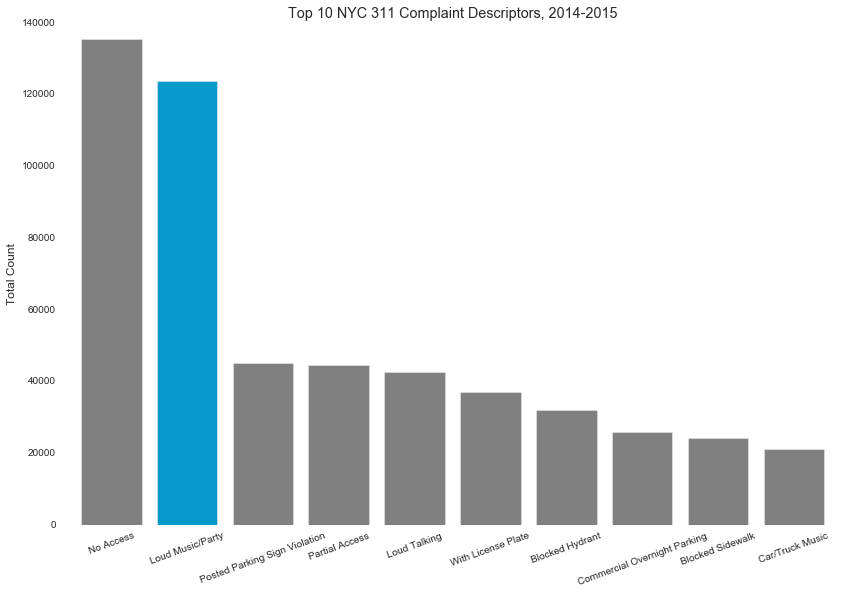

In [305]:
cool_blue = '#0699C9'
hot_red = '#DE182F'

colors = []
for i in range(df["Descriptor"].unique().size):
    if i == 1:
        colors.append(cool_blue)
    else:
        colors.append('gray')

ax = df["Descriptor"].value_counts()[:10].plot(kind='bar', width=.8, color=colors, rot=20, legend=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.title("Top 10 NYC 311 Complaint Descriptors, 2014-2015")
plt.ylabel("Total Count")

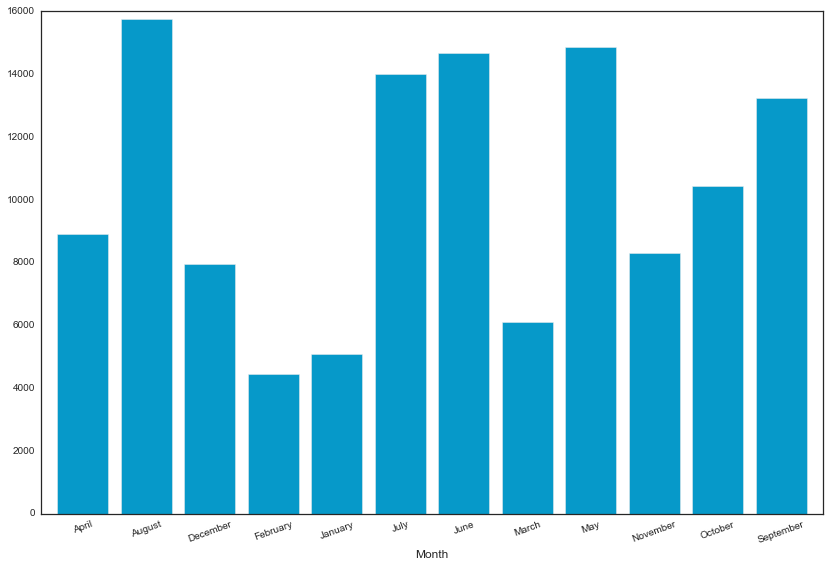

In [287]:
month_plot_df = df[(df["Descriptor"] == "Loud Music/Party")].groupby("Month").count()["Unique Key"]
ax = month_plot_df.plot(kind="bar", width=.8, color='#0699C9', rot=20, legend=False)

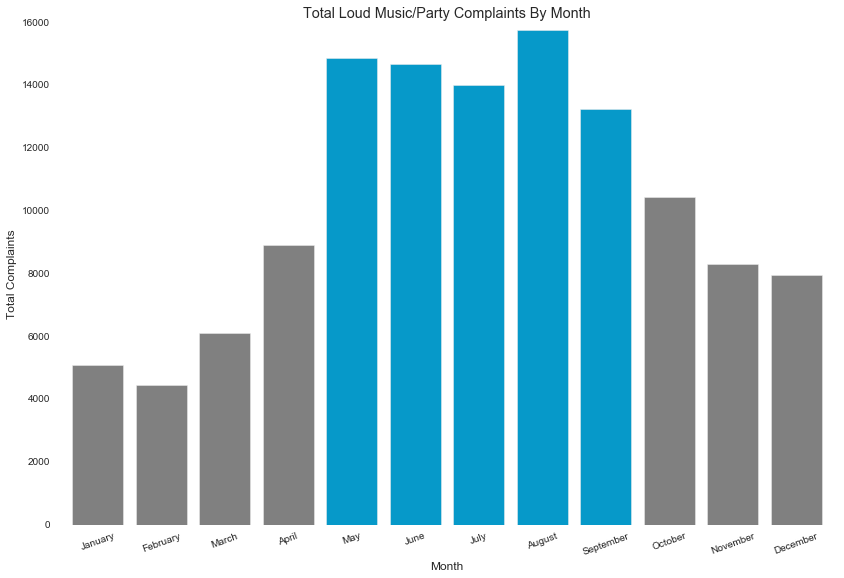

In [315]:
month_colors = []
for i in range(13):
    if 4 <= i <= 8:
        month_colors.append(cool_blue)
    else:
        month_colors.append('gray')
        
month_plot_df = df[(df["Descriptor"] == "Loud Music/Party")].groupby("Month").count()["Unique Key"]
ax = month_plot_df.ix[months[1:]].plot(kind="bar", width=.8, color=month_colors, rot=20, legend=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.title("Total Loud Music/Party Complaints By Month")
plt.ylabel("Total Complaints")

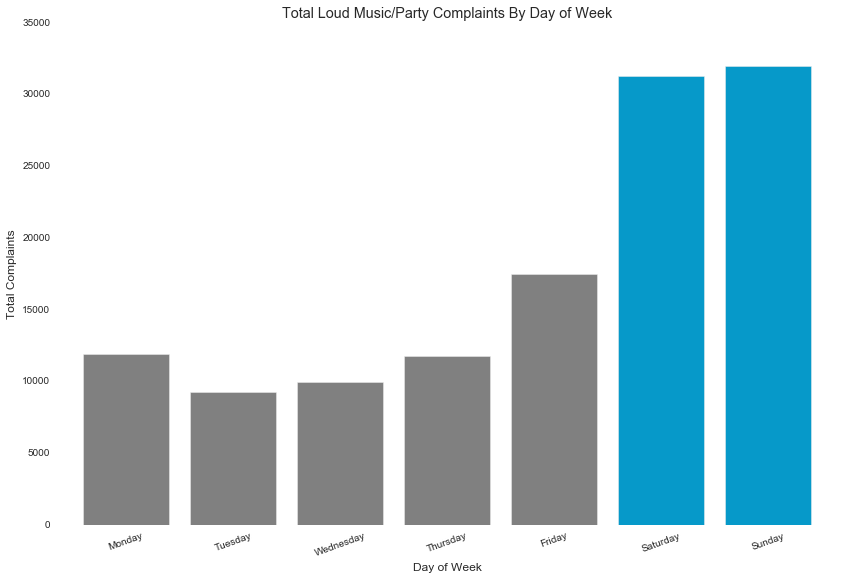

In [316]:
day_colors = []
for i in range(7):
    if 5 <= i <= 7:
        day_colors.append(cool_blue)
    else:
        day_colors.append('gray')
month_plot_df = df[(df["Descriptor"] == "Loud Music/Party")].groupby("Day of Week").count()["Unique Key"]
ax = month_plot_df.ix[days].plot(kind="bar",width=.8, color=day_colors, rot=20, legend=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.title("Total Loud Music/Party Complaints By Day of Week")plt.ylabel("Total Complaints")

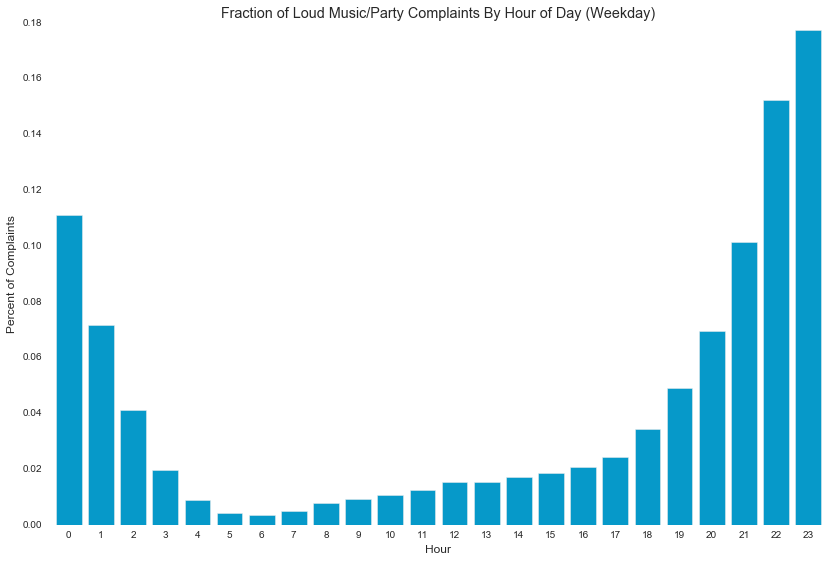

In [354]:
weekday_df = df[(df["Descriptor"] == "Loud Music/Party") & (~df["Day of Week"].isin(["Saturday", "Sunday"]))]
month_plot_df = weekday_df.groupby("Hour").count()["Unique Key"] / weekday_df.groupby("Hour").count()["Unique Key"].sum()
ax = month_plot_df.plot(kind="bar", width=.8, color=cool_blue, rot=0, legend=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.title("Fraction of Loud Music/Party Complaints By Hour of Day (Weekday)")
plt.ylabel("Percent of Complaints")

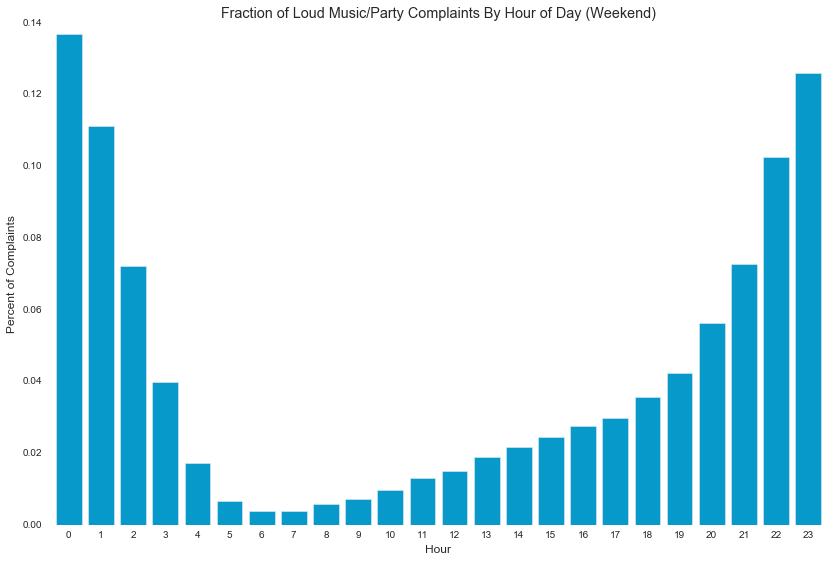

In [355]:
weekendday_df = df[(df["Descriptor"] == "Loud Music/Party") & (df["Day of Week"].isin(["Saturday", "Sunday"]))]
month_plot_df = weekendday_df.groupby("Hour").count()["Unique Key"] / weekendday_df.groupby("Hour").count()["Unique Key"].sum()
ax = month_plot_df.plot(kind="bar", width=.8, color=cool_blue, rot=0, legend=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.title("Fraction of Loud Music/Party Complaints By Hour of Day (Weekend)")
plt.ylabel("Percent of Complaints")

In [7]:
df["Created Date"] = pd.to_datetime(df["Created Date"])

In [8]:
df["Year"] = df["Created Date"].apply(lambda x: x.year)

In [9]:
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
months = ["NaN", "January", "February", "March", "April", "May",
          "June", "July", "August", "September", "October", "November", "December"]

In [10]:
df["Day of Week"] = df["Created Date"].apply(lambda x: days[x.dayofweek])

In [11]:
df["Month"] = df["Created Date"].apply(lambda x: months[x.month])

In [12]:
df["Hour"] = df["Created Date"].apply(lambda x: x.hour)

In [13]:
df["Date"] = df["Created Date"].apply(lambda dt: datetime.datetime(dt.year, dt.month, dt.day))

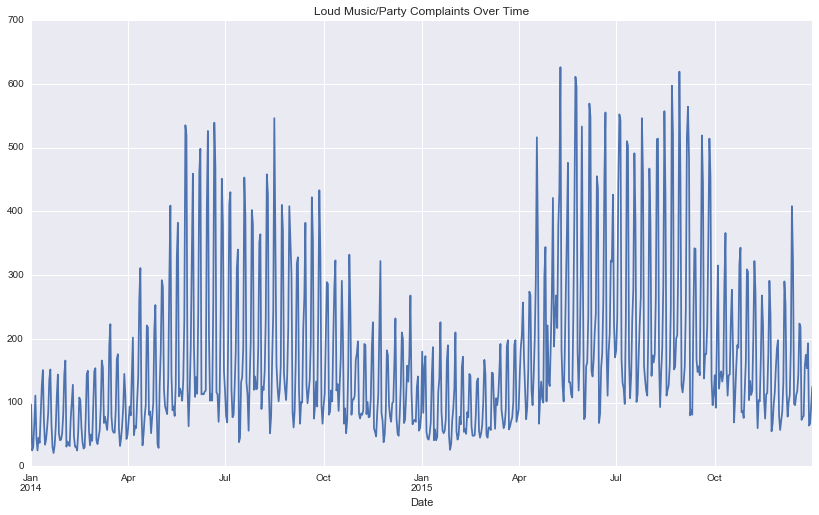

In [50]:
df[df["Descriptor"] == "Loud Music/Party"].groupby(df["Date"]).count()["Unique Key"].plot(figsize=(14, 8))
plt.title("Loud Music/Party Complaints Over Time")

In [23]:
new_years = df[(df["Descriptor"] == "Loud Music/Party") & (df["Date"] == "2014-12-31") | (df["Date"] == "2015-01-01")]

In [26]:
new_years_no_access = df[(df["Descriptor"] == "No Access") & (df["Date"] == "2014-12-31") | (df["Date"] == "2015-01-01")]

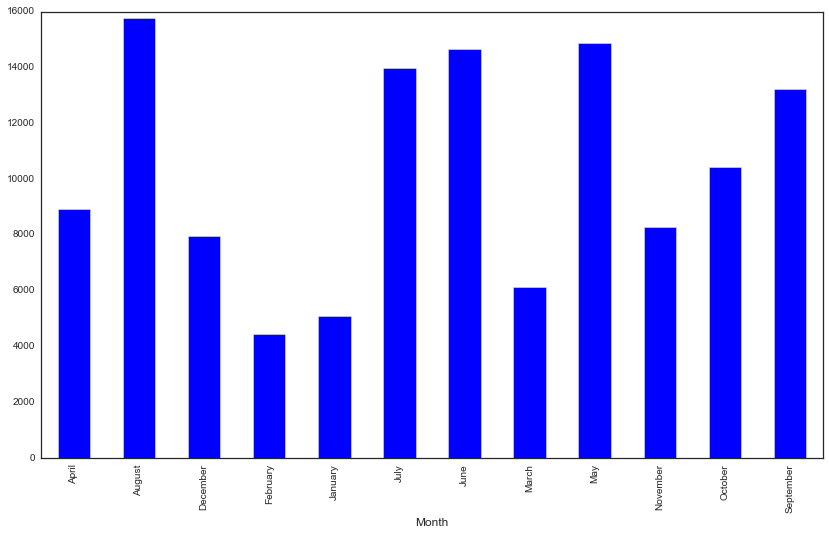

In [275]:
df[(df["Descriptor"] == "Loud Music/Party")].groupby("Month").count()["Unique Key"].plot(figsize=(14, 8), kind="bar")

In [70]:
parties = df[df["Descriptor"] == "Loud Music/Party"]

In [166]:
def get_hourly_counts(day):
    counts = []
    for i in range(24):
        counts.append(parties.groupby(["Day of Week", "Hour"]).get_group((day, i)).count()["Unique Key"])
    return counts

In [167]:
day_counts = pd.DataFrame({"Monday": get_hourly_counts("Monday"),
             "Tuesday": get_hourly_counts("Tuesday"),
             "Wednesday": get_hourly_counts("Wednesday"),
             "Thursday": get_hourly_counts("Thursday"),
             "Friday": get_hourly_counts("Friday"),
             "Saturday": get_hourly_counts("Saturday"),
             "Sunday": get_hourly_counts("Sunday")})

In [168]:
day_counts = day_counts.transpose()

In [170]:
by_day_df = day_counts.transpose()

In [173]:
by_day_df = by_day_df[days]

In [182]:
for day in days:
    by_day_df[day] = by_day_df[day] / parties["Day of Week"].value_counts()[day]

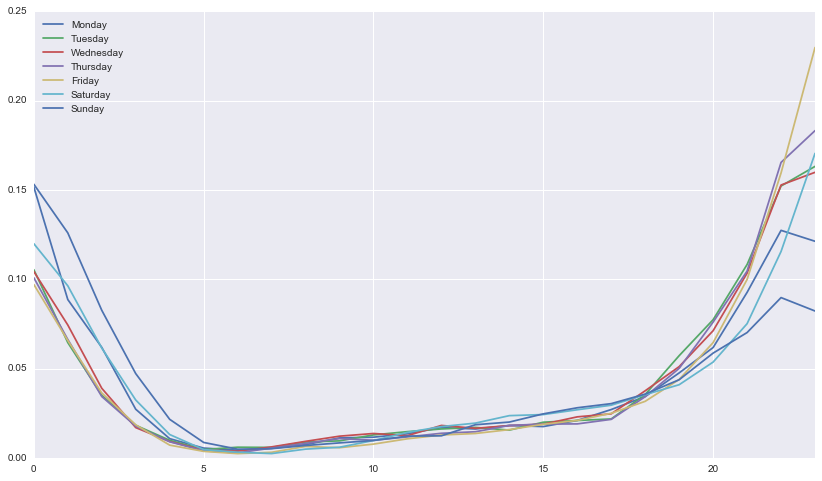

In [183]:
by_day_df.plot(figsize=(14, 8))

In [109]:
parties.set_index(["Date"]).resample('D', how="count")["Day of Week"]

Date
2014-01-01     97
2014-01-02     25
2014-01-03     30
2014-01-04     67
2014-01-05    111
2014-01-06     44
2014-01-07     25
2014-01-08     45
2014-01-09     37
2014-01-10     80
2014-01-11    126
2014-01-12    151
2014-01-13     71
2014-01-14     34
2014-01-15     42
2014-01-16     61
2014-01-17     84
2014-01-18    136
2014-01-19    152
2014-01-20     67
2014-01-21     30
2014-01-22     21
2014-01-23     33
2014-01-24     61
2014-01-25    110
2014-01-26    144
2014-01-27     51
2014-01-28     41
2014-01-29     42
2014-01-30     52
             ... 
2015-12-02     72
2015-12-03     86
2015-12-04    132
2015-12-05    290
2015-12-06    255
2015-12-07    118
2015-12-08     78
2015-12-09    101
2015-12-10    112
2015-12-11    185
2015-12-12    408
2015-12-13    322
2015-12-14     98
2015-12-15     96
2015-12-16    112
2015-12-17    118
2015-12-18    145
2015-12-19    224
2015-12-20    219
2015-12-21     73
2015-12-22     77
2015-12-23     79
2015-12-24    156
2015-12-25    175
2015-

In [190]:
geo = parties[(40.61 <= parties.Latitude) &
        (parties.Latitude <= 40.91) &
       (-74.06 <= parties.Longitude) &
       (parties.Longitude <= -73.77)]

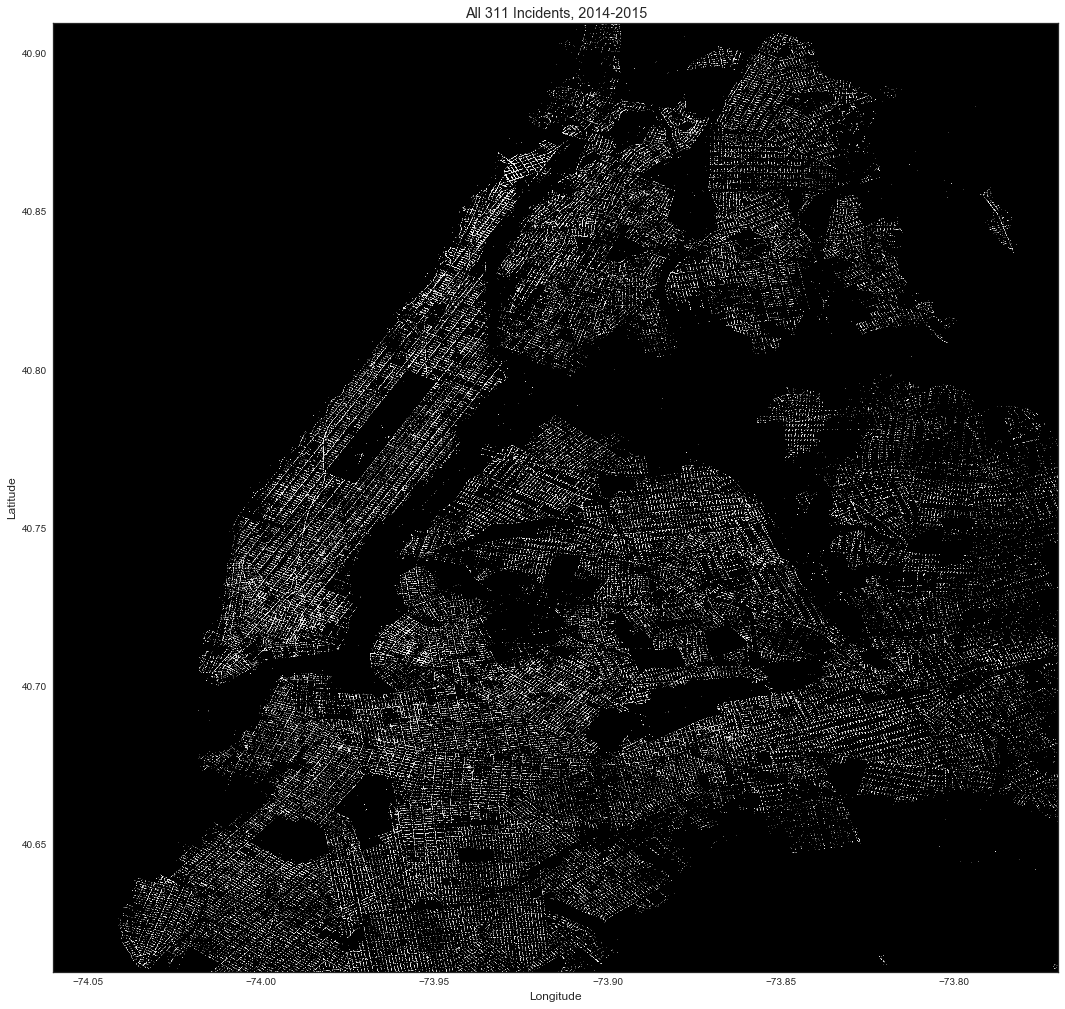

In [369]:
import matplotlib
 
from matplotlib import rcParams  
rcParams['figure.dpi'] = 300

ax=df.plot(kind='scatter', x='Longitude', y='Latitude',
           color='white',xlim=(-74.06,-73.77),
           ylim=(40.61, 40.91),s=.4,alpha=.2, figsize=(18, 17))
ax.set_axis_bgcolor('black') #Background Color
plt.title("All 311 Incidents, 2014-2015")